# NAIVE BAYES CLASSIFICATION OF TWITTER DATASET

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [3]:
file_path = '/content/drive/MyDrive/internship/twitter_training.csv'
data_train = pd.read_csv(file_path, header=None)
headers = ["ID", "Source", "sentiment", "text"]
data_train.columns = headers
print(data_train.head())

     ID       Source  sentiment  \
0    ID       Source  sentiment   
1  2401  Borderlands   Positive   
2  2401  Borderlands   Positive   
3  2401  Borderlands   Positive   
4  2401  Borderlands   Positive   

                                                text  
0                                               text  
1  im getting on borderlands and i will murder yo...  
2  I am coming to the borders and I will kill you...  
3  im getting on borderlands and i will kill you ...  
4  im coming on borderlands and i will murder you...  


In [4]:
testing_dataset = '/content/drive/MyDrive/internship/twitter_validation.csv'
data_val = pd.read_csv(testing_dataset, header=None)
headers = ["ID", "Source", "sentiment", "text"]
data_val.columns = headers
print(data_val.head())

     ID     Source   sentiment  \
0    ID     Source   sentiment   
1  3364   Facebook  Irrelevant   
2   352     Amazon     Neutral   
3  8312  Microsoft    Negative   
4  4371      CS-GO    Negative   

                                                text  
0                                               text  
1  I mentioned on Facebook that I was struggling ...  
2  BBC News - Amazon boss Jeff Bezos rejects clai...  
3  @Microsoft Why do I pay for WORD when it funct...  
4  CSGO matchmaking is so full of closet hacking,...  


In [5]:
data_train.head()

,ID,Source,sentiment,text
0,ID,Source,sentiment,text
1,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
2,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
3,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
4,2401,Borderlands,Positive,im coming on borderlands and i will murder you...


In [6]:
data_val.head()

,ID,Source,sentiment,text
0,ID,Source,sentiment,text
1,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
2,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
3,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
4,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."


In [7]:
data_train['sentiment'].value_counts()

sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
sentiment         1
Name: count, dtype: int64

In [8]:
data_val['sentiment'].value_counts()

sentiment
Neutral       285
Positive      277
Negative      266
Irrelevant    172
sentiment       1
Name: count, dtype: int64

<Axes: >

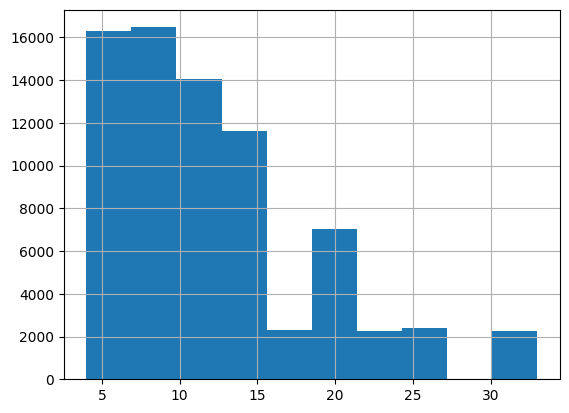

In [9]:
data_train['Source'].str.len().hist()

In [10]:
data_train.dropna(inplace = True)

In [11]:
data_val.dropna(inplace = True)

In [12]:
data_train.drop_duplicates(inplace=True)
data_val.drop_duplicates(inplace=True)

In [13]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import nltk

In [14]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [15]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [16]:
data_train['text'] = data_train['text'].astype(str)
data_val['text'] = data_val['text'].astype(str)

In [17]:
def preprocess_text(text):
    text = text.translate(str.maketrans('', '', string.punctuation))

    #text = text.replace('NaN', ' ')
    text = text.strip()
    text = text.lower()
    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)



data_train['processed_text'] = data_train['text'].apply(preprocess_text)
data_val['processed_text'] = data_val['text'].apply(preprocess_text)

data_train.head(), data_val.head()

(     ID       Source  sentiment  \
 0    ID       Source  sentiment   
 1  2401  Borderlands   Positive   
 2  2401  Borderlands   Positive   
 3  2401  Borderlands   Positive   
 4  2401  Borderlands   Positive   
 
                                                 text  \
 0                                               text   
 1  im getting on borderlands and i will murder yo...   
 2  I am coming to the borders and I will kill you...   
 3  im getting on borderlands and i will kill you ...   
 4  im coming on borderlands and i will murder you...   
 
                  processed_text  
 0                          text  
 1  im getting borderland murder  
 2            coming border kill  
 3    im getting borderland kill  
 4   im coming borderland murder  ,
      ID     Source   sentiment  \
 0    ID     Source   sentiment   
 1  3364   Facebook  Irrelevant   
 2   352     Amazon     Neutral   
 3  8312  Microsoft    Negative   
 4  4371      CS-GO    Negative   
 
               

In [18]:
data_train = data_train.drop(columns=['text'])

In [19]:
data_train.rename(columns={'processed_text': 'text'}, inplace=True)

In [20]:
data_val = data_val.drop(columns=['text'])

In [21]:
data_val.rename(columns={'processed_text': 'text'}, inplace=True)

In [22]:
data_train.head()

,ID,Source,sentiment,text
0,ID,Source,sentiment,text
1,2401,Borderlands,Positive,im getting borderland murder
2,2401,Borderlands,Positive,coming border kill
3,2401,Borderlands,Positive,im getting borderland kill
4,2401,Borderlands,Positive,im coming borderland murder


In [23]:
data_val.head()

,ID,Source,sentiment,text
0,ID,Source,sentiment,text
1,3364,Facebook,Irrelevant,mentioned facebook struggling motivation go ru...
2,352,Amazon,Neutral,bbc news amazon bos jeff bezos reject claim co...
3,8312,Microsoft,Negative,microsoft pay word function poorly samsungus c...
4,4371,CS-GO,Negative,csgo matchmaking full closet hacking truly awf...


## Plotting Hisoragrams and bargraphs

In [24]:
data = pd.concat([data_train, data_val], ignore_index=True)
data

,ID,Source,sentiment,text
0,ID,Source,sentiment,text
1,2401,Borderlands,Positive,im getting borderland murder
2,2401,Borderlands,Positive,coming border kill
3,2401,Borderlands,Positive,im getting borderland kill
4,2401,Borderlands,Positive,im coming borderland murder
...,...,...,...,...
72653,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ toronto art culture capital canada ’ wonder...
72654,4359,CS-GO,Irrelevant,actually good move tot bring viewer one people...
72655,2652,Borderlands,Positive,today sucked ’ time drink wine n play borderla...
72656,8069,Microsoft,Positive,bought fraction microsoft today small win


### Word Cloud

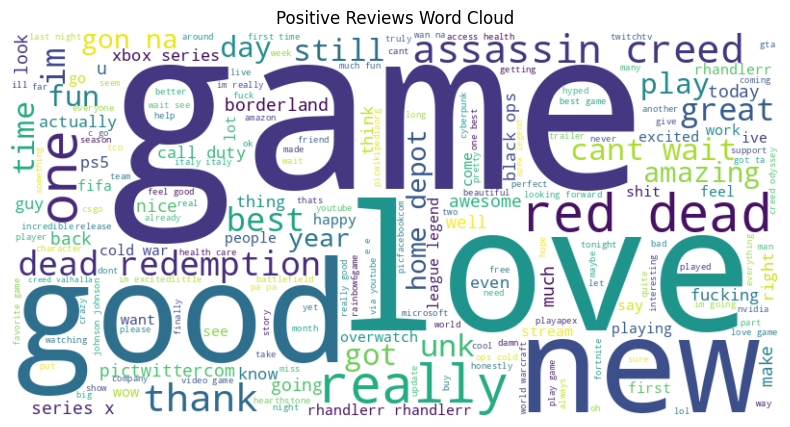

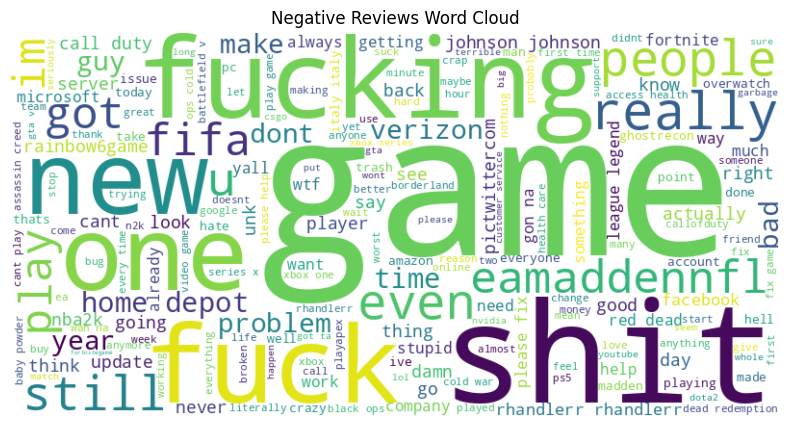

In [25]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

positive_reviews = data[data['sentiment'] == 'Positive']['text']
negative_reviews = data[data['sentiment'] == 'Negative']['text']

def generate_wordcloud(text, title):
    if text.empty:
        print(f"No {title.lower()} reviews to generate word cloud.")
        return

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

generate_wordcloud(positive_reviews, 'Positive Reviews Word Cloud')
generate_wordcloud(negative_reviews, 'Negative Reviews Word Cloud')

### Bar Plot of Top N words

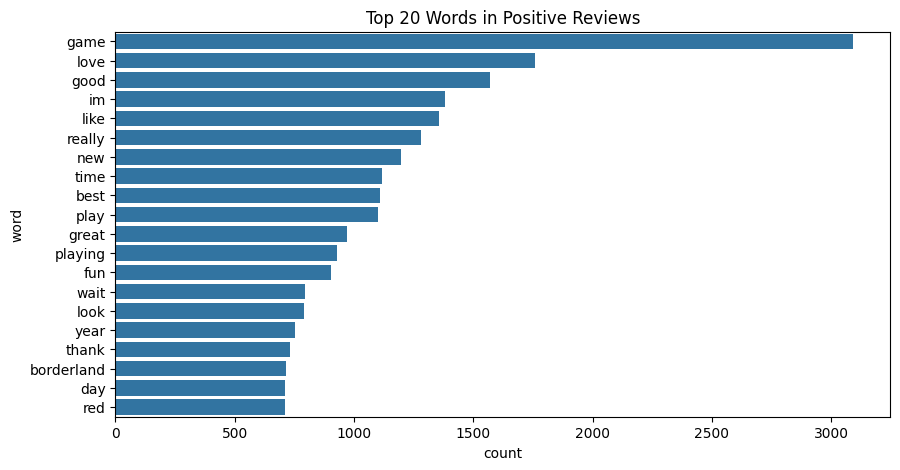

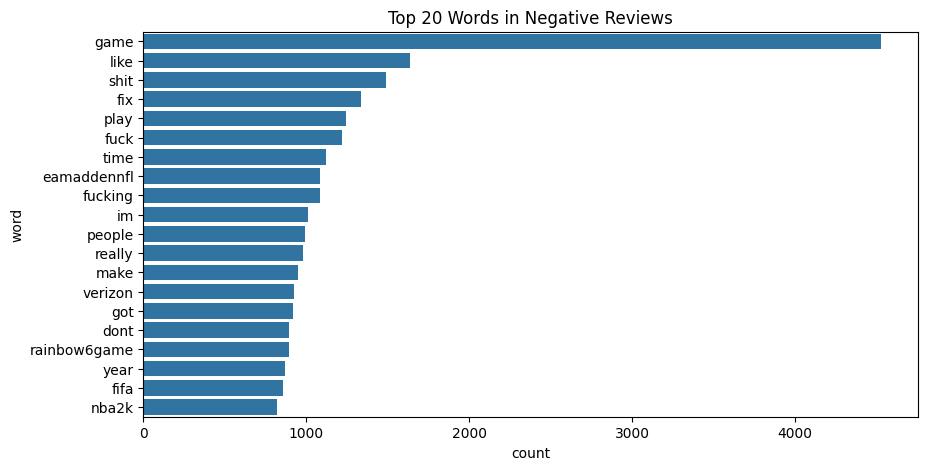

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

def plot_top_n_words(reviews, sentiment, n=20):
    vectorizer = CountVectorizer(stop_words='english', max_features=n)
    X = vectorizer.fit_transform(reviews)
    word_counts = X.sum(axis=0).A1
    words = vectorizer.get_feature_names_out()
    word_freq = pd.DataFrame({'word': words, 'count': word_counts}).sort_values(by='count', ascending=False)

    plt.figure(figsize=(10, 5))
    sns.barplot(x='count', y='word', data=word_freq)
    plt.title(f'Top {n} Words in {sentiment.capitalize()} Reviews')
    plt.show()

# Plot top words for positive and negative reviews
plot_top_n_words(positive_reviews, 'Positive')
plot_top_n_words(negative_reviews, 'Negative')


### Sentiment Distribution

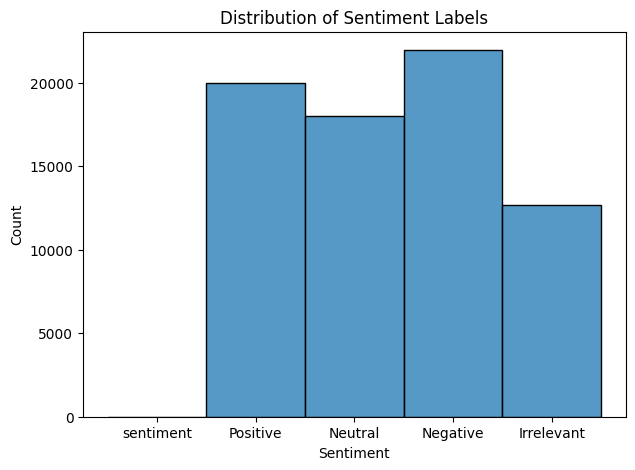

In [27]:
# Plot histogram
plt.figure(figsize=(7, 5))
sns.histplot(data['sentiment'], kde=False, discrete=True)
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


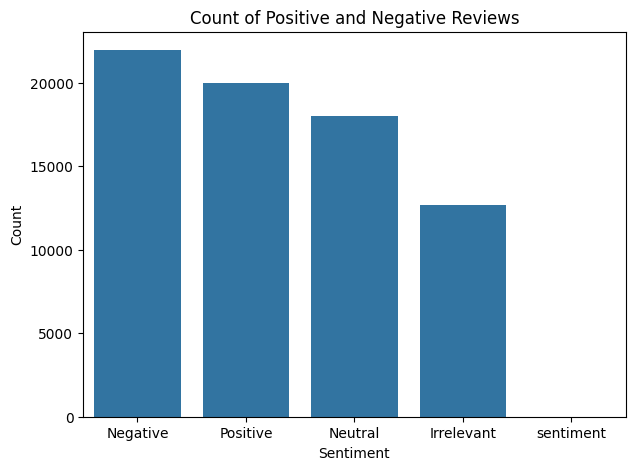

In [28]:
# Count of positive and negative reviews
sentiment_counts = data['sentiment'].value_counts()

# Bar plot
plt.figure(figsize=(7, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Count of Positive and Negative Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


## Tokenization

In [29]:
import re

def tokenize(text):
    # Remove non-alphabetic characters and split the text into words
    tokens = re.sub(r'[^a-zA-Z\s]', '', text).split()
    # Convert to lowercase
    tokens = [word.lower() for word in tokens]
    return tokens

## TF-IDF Approach

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vectorizer = TfidfVectorizer(use_idf=True,ngram_range=(1,3))
final_vectorized_data = tf_idf_vectorizer.fit_transform(data['text'])

final_vectorized_data

<72658x701589 sparse matrix of type '<class 'numpy.float64'>'
	with 2135268 stored elements in Compressed Sparse Row format>

In [31]:
target = data['sentiment']
from sklearn.model_selection import train_test_split
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(
    final_vectorized_data,
    target,
    test_size=0.005,
    random_state=42
)

# Output the shapes of the resulting splits to verify
print("Shapes of Train/Test splits:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

Shapes of Train/Test splits:
X_train: (72294, 701589)
X_test: (364, 701589)
y_train: (72294,)
y_test: (364,)


## NAIVE BAYES CLASSIFICATION ALGORITHM

In [32]:
from sklearn.naive_bayes import MultinomialNB
model_naive = MultinomialNB()
model_naive.fit(X_train, y_train)
predicted_naive = model_naive.predict(X_test)
print("Predictions:", predicted_naive)

Predictions: ['Negative' 'Neutral' 'Positive' 'Negative' 'Negative' 'Neutral'
 'Positive' 'Negative' 'Negative' 'Irrelevant' 'Negative' 'Negative'
 'Positive' 'Positive' 'Positive' 'Positive' 'Irrelevant' 'Neutral'
 'Negative' 'Irrelevant' 'Positive' 'Irrelevant' 'Negative' 'Neutral'
 'Neutral' 'Positive' 'Positive' 'Negative' 'Negative' 'Positive'
 'Negative' 'Neutral' 'Neutral' 'Neutral' 'Negative' 'Negative' 'Positive'
 'Negative' 'Positive' 'Negative' 'Negative' 'Neutral' 'Negative'
 'Neutral' 'Neutral' 'Negative' 'Neutral' 'Irrelevant' 'Negative'
 'Neutral' 'Neutral' 'Irrelevant' 'Neutral' 'Positive' 'Negative'
 'Negative' 'Negative' 'Negative' 'Negative' 'Positive' 'Positive'
 'Neutral' 'Positive' 'Neutral' 'Neutral' 'Negative' 'Negative' 'Neutral'
 'Irrelevant' 'Positive' 'Negative' 'Negative' 'Negative' 'Positive'
 'Positive' 'Negative' 'Negative' 'Negative' 'Neutral' 'Negative'
 'Neutral' 'Irrelevant' 'Irrelevant' 'Negative' 'Negative' 'Negative'
 'Neutral' 'Positive' 'Irrelev

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
conf_matrix = confusion_matrix(y_test, predicted_naive)
print("Confusion Matrix:\n", conf_matrix)
accuracy = accuracy_score(y_test, predicted_naive)
print("Accuracy:", accuracy)
class_report = classification_report(y_test, predicted_naive, target_names=['Negative', 'Neutral', 'Positive', 'Irrelevant'])
print("Classification Report:\n", class_report)

Confusion Matrix:
 [[62 13  3 11]
 [ 0 94  2  2]
 [ 0  9 74  3]
 [ 0  3  0 88]]
Accuracy: 0.8736263736263736
Classification Report:
               precision    recall  f1-score   support

    Negative       1.00      0.70      0.82        89
     Neutral       0.79      0.96      0.87        98
    Positive       0.94      0.86      0.90        86
  Irrelevant       0.85      0.97      0.90        91

    accuracy                           0.87       364
   macro avg       0.89      0.87      0.87       364
weighted avg       0.89      0.87      0.87       364



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


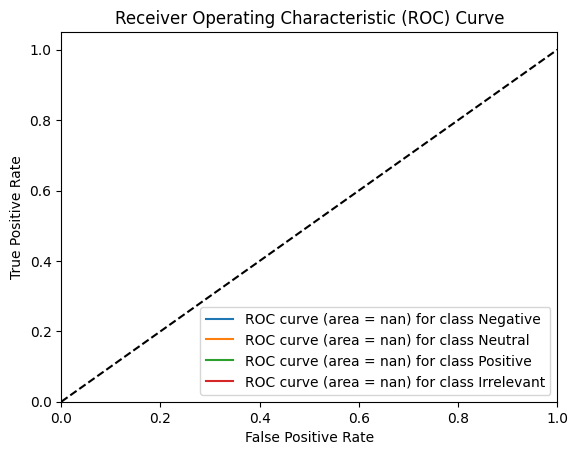

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


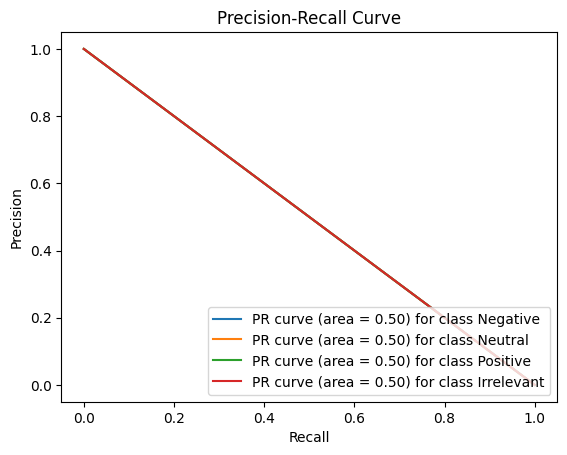

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import label_binarize
import numpy as np

classes = ['Negative', 'Neutral', 'Positive', 'Irrelevant']

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3])
predicted_naive_binarized = label_binarize(predicted_naive, classes=[0, 1, 2, 3])


fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], predicted_naive_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


plt.figure()
for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:0.2f}) for class {classes[i]}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

precision = dict()
recall = dict()
pr_auc = dict()
for i in range(len(classes)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], predicted_naive_binarized[:, i])
    pr_auc[i] = auc(recall[i], precision[i])

plt.figure()
for i in range(len(classes)):
    plt.plot(recall[i], precision[i], label=f'PR curve (area = {pr_auc[i]:0.2f}) for class {classes[i]}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()


In [40]:
import pandas as pd
import random

twitter_validation = pd.read_csv('/content/drive/MyDrive/internship/twitter_validation.csv')
random_index = random.randint(0, len(twitter_validation) - 1)
random_text = twitter_validation.iloc[random_index]['text']
print("Randomly selected text for prediction:", random_text)
random_text_transformed = tf_idf_vectorizer.transform([random_text])
random_text_prediction = model_naive.predict(random_text_transformed)

print("Predicted Class for new data:", random_text_prediction)

Randomly selected text for prediction: @NBA2K you guys gotta get Chris smoove as 2k manager. He commentates real basketball, has influence and has the most basketball knowledge when it comes to playing and understanding. Go after him he won’t reach out for a shite job, make the offer make sense
Predicted Class for new data: ['Neutral']
